In [20]:
import requests
import pandas as pd
import json
import numpy as np
from bs4 import BeautifulSoup as bs
import time
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st

In [3]:
df = pd.read_csv("mastodon_data_raw.csv")

In [4]:
df.drop_duplicates(subset='Post ID', keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)


large language models
natural language processing

# Next steps:
# Analize the content of the 'publish' (words used)
# Analize the content of the 'publish' (emotions)
# Analize the content of the 'publish' (emojis)
# Analize the answers of the 'publish' (words used)
# Analize the answers of the 'publish' (emotions)
# Analize the answers of the 'publish' (emojis)
# Analize if the 'publish' used words or hashtags related to it´s current Trending topics(#´s)


In [5]:
df['Post Time'] = pd.to_datetime(df['Post Time'])

df['media_input'] = df['Cointains Media'].apply(lambda x: 1 if len(x) > 2 else 0)
df = df.rename(columns={
    'User Followers': 'User´s # of Followers',
    'Post Length': 'Post´s Length',
    'Favorites': '# of Favorites',
    'Boosts': '# of Boosts',
    'media_input': 'Post has Media'
    })
df.head()

,Post ID,Username,User´s # of Followers,Post´s Length,Mentions,Number of Mentions (@),Hashtags,Number of Hashtags (#),Cointains Media,# of Favorites,# of Boosts,Post Time,Post has Media
0,113516318979841306,SocraticEthics,58317,395,[],0,"[{'name': 'ukraine', 'url': 'https://mastodon....",19,[],0,0,2024-11-20 16:52:43+00:00,0
1,113516318905258501,grb090423,1041,26,"[{'id': '110702580156012955', 'username': 'sun...",1,[],0,[],0,0,2024-11-20 16:52:42+00:00,0
2,113516318851318777,GamingNews,2940,629,[],0,"[{'name': 'gamingnews', 'url': 'https://mastod...",1,"[{'id': '113516318837123005', 'type': 'image',...",0,0,2024-11-20 16:52:40+00:00,1
3,113516318611944838,clickhere,1305,84,"[{'id': '110708145306260555', 'username': 'Ben...",1,"[{'name': 'sneachtdown', 'url': 'https://masto...",4,[],0,0,2024-11-20 16:52:40+00:00,0
4,113516318579454094,geo,1,89,"[{'id': '110801673167339147', 'username': 'hal...",1,[],0,[],0,0,2024-11-20 16:52:38+00:00,0


In [7]:
fig = go.Figure(
    data=[
        #go.Scatter(x=df['Favorites'],y=df['Post Length'])
        go.Scatter(x=df['Post´s Length'],y=df['Favorites'])
    ],
    layout_title='scatter'
)

fig.show()

KeyError: 'Favorites'

KeyError: 'Boosts'

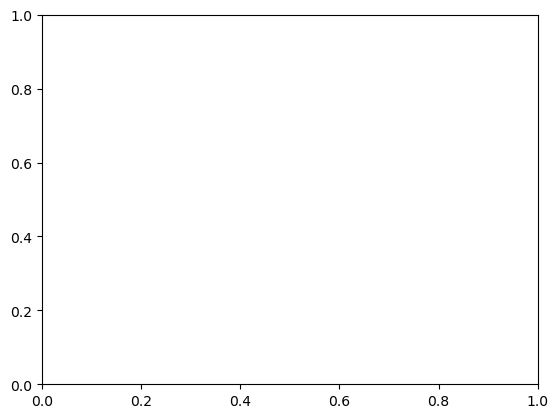

In [8]:
df.plot.scatter(x="Boosts",y="User Followers")

KeyError: 'User Followers'

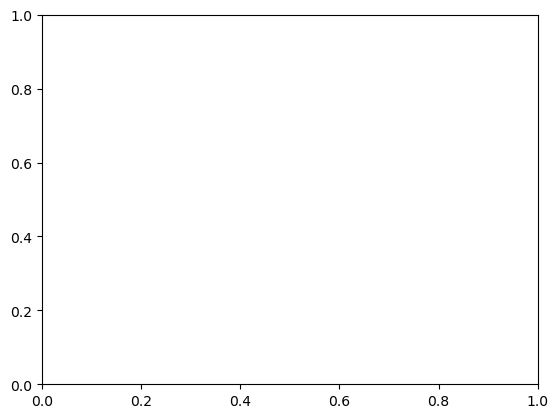

In [9]:
df.plot.scatter(x="User Followers",y="Boosts")

In [10]:
df_clean = df.drop(columns=['Post ID', 'Username', 'Mentions',
       'Hashtags','Cointains Media'])
df_clean.head()


,User´s # of Followers,Post´s Length,Number of Mentions (@),Number of Hashtags (#),# of Favorites,# of Boosts,Post Time,Post has Media
0,58317,395,0,19,0,0,2024-11-20 16:52:43+00:00,0
1,1041,26,1,0,0,0,2024-11-20 16:52:42+00:00,0
2,2940,629,0,1,0,0,2024-11-20 16:52:40+00:00,1
3,1305,84,1,4,0,0,2024-11-20 16:52:40+00:00,0
4,1,89,1,0,0,0,2024-11-20 16:52:38+00:00,0


**Correlation between each parameter with each other.**

**Correlation between the number of mentions (@) and the number of hashtags (#) in the posts.**

In [11]:
fig = px.scatter(df_clean, x='Number of Mentions (@)', y='Number of Hashtags (#)', 
                 title='Mentions vs. Hashtags in Posts',
                 labels={'Number of Mentions (@)': 'Mentions', 'Number of Hashtags (#)': 'Hashtags'})
fig.show()

**How the length of the posts (Post´s Length) affects engagement (i.e., favorites and boosts)**

In [12]:
fig = px.scatter(df_clean, x='Post´s Length', y='# of Favorites', color='# of Boosts',
                 title='Engagement vs. Post Length',
                 labels={'Post´s Length': 'Post Length (Characters)', '# of Favorites': 'Favorites', '# of Boosts': 'Boosts'})
fig.show()


**Does the number of followers (User´s # of Followers) influences the level of engagement on posts (i.e., favorites and boosts)?**

In [13]:
fig = px.scatter(df_clean, x='User´s # of Followers', y='# of Favorites', color='# of Boosts',
                 title='Followers vs Engagement (Favorites and Boosts)',
                 labels={'User´s # of Followers': 'Number of Followers', '# of Favorites': 'Favorites', '# of Boosts': 'Boosts'})
fig.show()


**How the length of posts differs between those with media and those without?**

In [14]:
fig = px.histogram(df_clean, x='Post´s Length', color='Post has Media', 
                   title='Post Length Distribution by Media Presence',
                   labels={'Post´s Length': 'Post Length (Characters)', 'Post has Media': 'Contains Media'})
fig.show()


In [15]:
fig = px.pie(df_clean, names='Post has Media', title='Proportion of Posts with Media vs. No Media')
fig.show()


In [23]:

df_clean
df_clean.to_csv("mastodon_data.csv", index=False)

In [17]:
fig = px.imshow(df_clean.corr(), text_auto=True, aspect="auto", color_continuous_scale='Viridis')
fig.show()

In [21]:
posts_with_media = df[df["Post has Media"] == 1]

# Calculate shared vs non-shared (Boosted vs not)
shared = posts_with_media["# of Boosts"].sum()
not_shared = len(posts_with_media) - shared

# Prepare data for the plot
plot_data = {
    "Category": ["Shared", "Not Shared"],
    "Count": [shared, not_shared],
}

# Convert plot data to DataFrame
plot_df = pd.DataFrame(plot_data)

# Create a pie chart using Plotly
fig = px.pie(plot_df, values='Count', names='Category', title="Percentage of Posts with Media that Got Shared")

# Show the plot in Streamlit
st.plotly_chart(fig)

2024-11-21 17:03:41.553 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 17:03:41.554 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 17:03:41.554 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 17:03:41.625 
  command:

    streamlit run c:\Users\rober\anaconda3\envs\VIZ\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-21 17:03:41.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()